### 1. Import Modules and Define Global Variables

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [15]:
!pip3 -q install pytorch_lightning
!pip3 -q install test-tube

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
The folder you are executing pip from can no longer be found.
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
The folder you are executing pip from can no longer be found.


In [2]:
import sys
sys.path.append('/content/gdrive/MyDrive/11785_SceneDetection_Quantization')
import yaml
from model.beta_vae import *
from trainer import *
from scene_detection import *

%cd '/content/gdrive/MyDrive/11785_SceneDetection_Quantization'

/content/gdrive/MyDrive/11785_SceneDetection_Quantization


In [3]:
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

### 2. Model Training

In [4]:
model = BetaVAE(**config['model_params'])

In [5]:
#model_trainer = Trainer(model, config['exp_params'], trained_model='Model_20210416')
model_trainer = Trainer(model, config['exp_params'])

In [6]:
model_trainer.fit()

------Epoch 1------
Train: total_loss:3.532722, recon_loss:0.394234, kld:3.138488
Val  : total_loss:0.662443, recon_loss:0.365549, kld:0.296894
=> save new model './best_model/Model_20210416'


------Epoch 2------
Train: total_loss:0.550429, recon_loss:0.367784, kld:0.182646
Val  : total_loss:0.457816, recon_loss:0.366963, kld:0.090853
=> save new model './best_model/Model_20210416'


------Epoch 3------
Train: total_loss:0.430153, recon_loss:0.365999, kld:0.064154
Val  : total_loss:0.407567, recon_loss:0.364459, kld:0.043108
=> save new model './best_model/Model_20210416'


------Epoch 4------
Train: total_loss:0.405612, recon_loss:0.365569, kld:0.040043
Val  : total_loss:0.396647, recon_loss:0.364179, kld:0.032468
=> save new model './best_model/Model_20210416'


------Epoch 5------
Train: total_loss:0.402175, recon_loss:0.365622, kld:0.036553
Val  : total_loss:0.392912, recon_loss:0.364099, kld:0.028814
=> save new model './best_model/Model_20210416'


------Epoch 6------
Train: total_loss:0.395371, recon_loss:0.364768, kld:0.030604
Val  : total_loss:0.391763, recon_loss:0.366634, kld:0.025129
=> save new model './best_model/Model_20210416'


------Epoch 7------
Train: total_loss:0.394342, recon_loss:0.366142, kld:0.028200
Val  : total_loss:0.385873, recon_loss:0.363907, kld:0.021966
=> save new model './best_model/Model_20210416'


------Epoch 8------
Train: total_loss:0.393290, recon_loss:0.366063, kld:0.027228
Val  : total_loss:0.386775, recon_loss:0.363910, kld:0.022865


------Epoch 9------
Train: total_loss:0.390699, recon_loss:0.365208, kld:0.025491
Val  : total_loss:0.381108, recon_loss:0.363560, kld:0.017548
=> save new model './best_model/Model_20210416'


------Epoch 10------
Train: total_loss:0.386475, recon_loss:0.365833, kld:0.020642
Val  : total_loss:0.380760, recon_loss:0.365487, kld:0.015274
=> save new model './best_model/Model_20210416'


### 3. Scene Change Detection

In [8]:
model = BetaVAE(**config['model_params'])
scene_detector = Scene_Detection(model, config['exp_params'], trained_model = 'Model_20210416')

=> loaded checkpoint './best_model/Model_20210416'


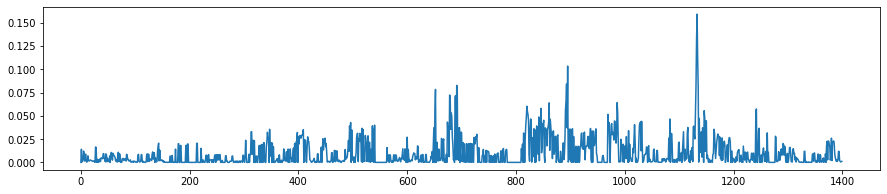

In [9]:
scene_detector.compute_scene_KL_divergence()